<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/05GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Started jan 22 Need Review
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
np.random.seed(42)
X= 2* np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)


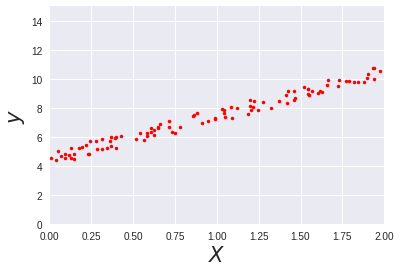

In [4]:
# Use . to make it looking like dots rather messy lines
plt.plot(X, y, "r.")
plt.xlabel("$X$", fontsize=21)
# $ for Italic
plt.ylabel("$y$", rotation=90, fontsize=21)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
#Simple For Loop
for i in range(4):
  print(X[i],y[i])

[0.74908024] [6.2786699]
[1.90142861] [10.34069625]
[1.46398788] [8.70631963]
[1.19731697] [8.1005216]


In [0]:
X_b = np.c_[np.ones((100,1)),X]
X_b[40:55]
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  


Now lets try using 3 methods to find the regression line:

In [50]:
np.random.seed(42)
epochs = 10
m=100
lr = 0.1
# random weight for beginning
initial_weight = np.random.randn(2, 1) 
np.random.randn(2, 1) 

array([[0.64768854],
       [1.52302986]])

In [0]:
weight = initial_weight

for epoch in range(epochs):
    gradient = 2/100 * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

In [45]:
y_predict = X_new_b.dot(weight)
y_predict

array([[ 3.99594361],
       [10.81176213]])

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

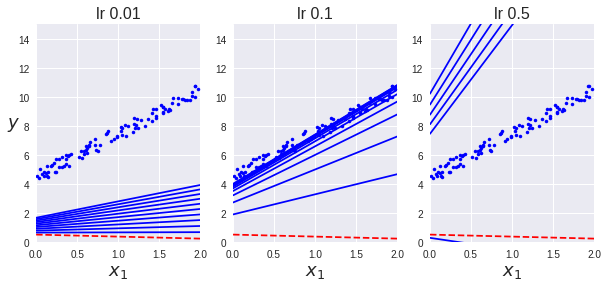

In [52]:
weight_path_bgd = []

plt.figure(figsize=(10,4))
plt.subplot(131); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(132); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(133); plot_gradient_descent(initial_weight, 0.5)
plt.show()

In [53]:
weight_path_bgd[-1]

array([[3.99594361],
       [3.40790926]])

##Linear regression using stochastic gradient descent


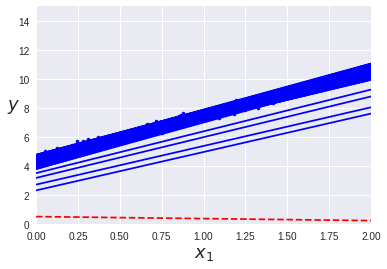

In [54]:
weight = initial_weight
weight_path_sgd = []

# plot training data
plt.plot(X, y, "b.")
# plot initial prediction
y_predict = X_new_b.dot(weight)                    
plt.plot(X_new, y_predict, "r--")        

weight_path_sgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(m):           
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradient = 2 * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_sgd.append(weight)
        
        y_predict = X_new_b.dot(weight)                    
        plt.plot(X_new, y_predict, "b-")        
    
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()                 

In [55]:
weight_path_sgd[-1]

array([[4.4536871 ],
       [2.85470945]])

##Linear regression using mini-batch gradient descent


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 2/batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [57]:
weight_path_mgd[-1]

array([[4.5613931 ],
       [3.04811809]])

In [0]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

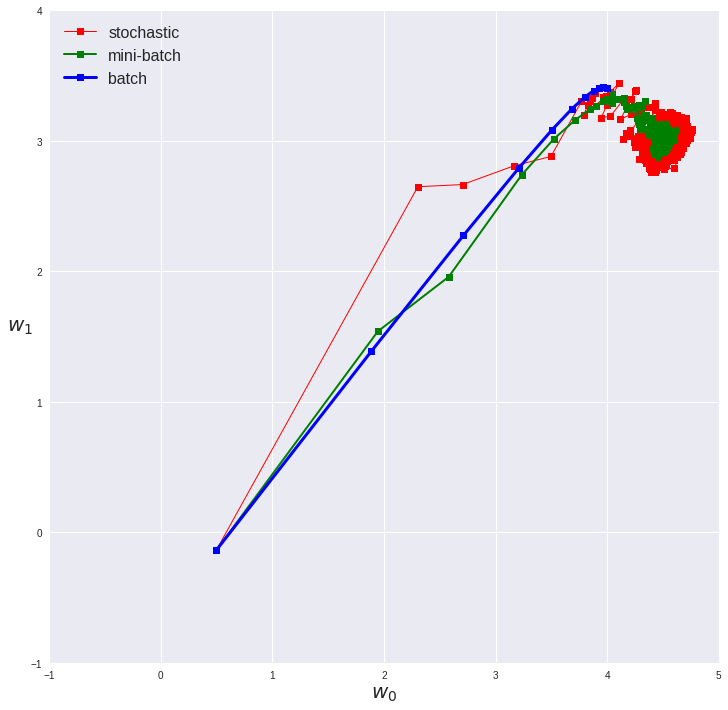

In [59]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

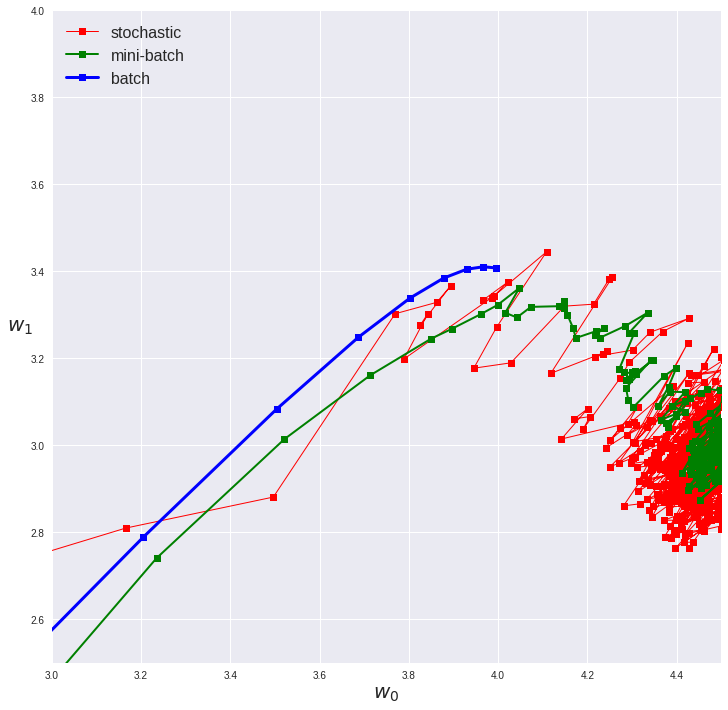

In [60]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()